# Análisis Exploratorio del IPC

In [ ]:
pip install yfinance

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 10.6 MB/s eta 0:00:00


# Cargar Librerías

In [ ]:
#Librerías para el procesamiento de Datos
import numpy as np
import pandas as pd
import math
from datetime import datetime
import datetime as dt

In [ ]:
#Lectura de Datos, desde Finance Yahoo
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
#Librerías estadísticas
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.tsa.stattools import adfuller
import arch

In [ ]:
#Librerías para la modelación
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment

In [ ]:
#Librerías de Visualización (Gráficos)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.rcParams["lines.linewidth"]=1.5

# Definir los tamaños del gráfico

In [ ]:
from pylab import rcParams
rcParams["figure.figsize"] = (16,5)

# Leer Datos

In [ ]:
#Cargar los datos
company = '^MXX'
ticker = yf.Ticker(company)
hist = ticker.history(start = '1991-11-17', end='2024-2-12')

hist


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1991-11-18 00:00:00-06:00,1415.900024,1415.900024,1415.900024,1415.900024,0,0.0,0.0
1991-11-19 00:00:00-06:00,1365.099976,1365.099976,1365.099976,1365.099976,0,0.0,0.0
1991-11-21 00:00:00-06:00,1387.900024,1387.900024,1387.900024,1387.900024,0,0.0,0.0
1991-11-22 00:00:00-06:00,1376.199951,1376.199951,1376.199951,1376.199951,0,0.0,0.0
1991-11-26 00:00:00-06:00,1365.199951,1365.199951,1365.199951,1365.199951,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-06:00,58012.878906,58273.171875,57744.339844,58226.769531,166980800,0.0,0.0
2024-02-06 00:00:00-06:00,58271.750000,59015.398438,57782.699219,58645.421875,266012200,0.0,0.0
2024-02-07 00:00:00-06:00,58625.929688,59020.550781,58382.761719,58711.871094,182573800,0.0,0.0


# Serie de Tiempo

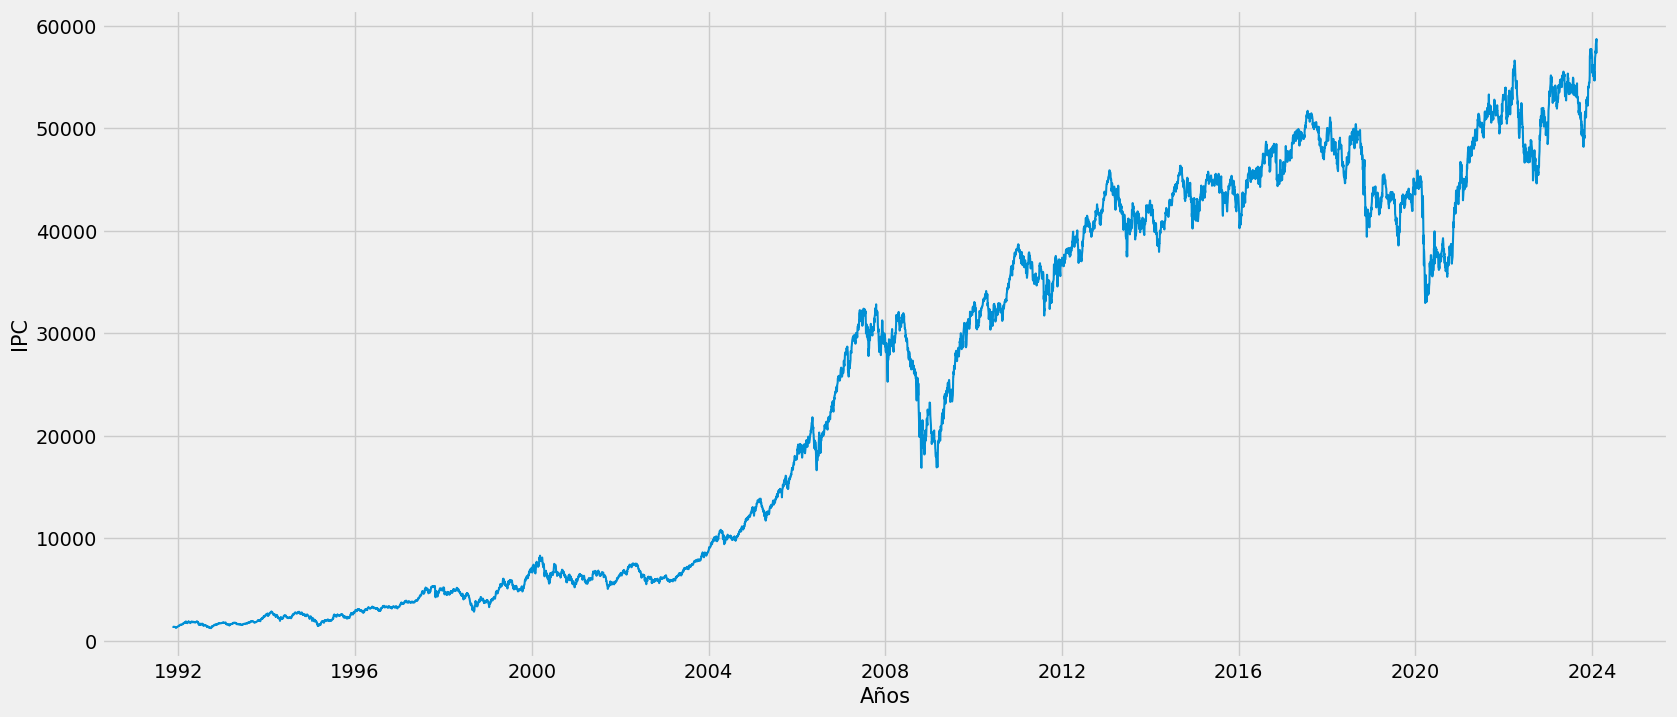

In [ ]:
plt.figure(figsize=(18,8))
plt.title("")
plt.plot(hist["Close"])
plt.xlabel("Años", fontsize=15)
plt.ylabel("IPC", fontsize=15)
plt.show()

# Limpiar la BD, quedarse sólo con la columna que se va a trabajar "Close"

In [ ]:
ipc = hist["Close"]
ipc.tail(5)

Date
2024-02-02 00:00:00-06:00    58226.769531
2024-02-06 00:00:00-06:00    58645.421875
2024-02-07 00:00:00-06:00    58711.871094
2024-02-08 00:00:00-06:00    57762.441406
2024-02-09 00:00:00-06:00    57327.500000
Name: Close, dtype: float64

# Obtener los máximos acumulados,

In [ ]:
max_acum = ipc.cummax ()
max_acum

Date
1991-11-18 00:00:00-06:00     1415.900024
1991-11-19 00:00:00-06:00     1415.900024
1991-11-21 00:00:00-06:00     1415.900024
1991-11-22 00:00:00-06:00     1415.900024
1991-11-26 00:00:00-06:00     1415.900024
                                 ...     
2024-02-02 00:00:00-06:00    58226.769531
2024-02-06 00:00:00-06:00    58645.421875
2024-02-07 00:00:00-06:00    58711.871094
2024-02-08 00:00:00-06:00    58711.871094
2024-02-09 00:00:00-06:00    58711.871094
Name: Close, Length: 8071, dtype: float64

# Gráfica de los máximos acumulados

<Axes: xlabel='Date'>

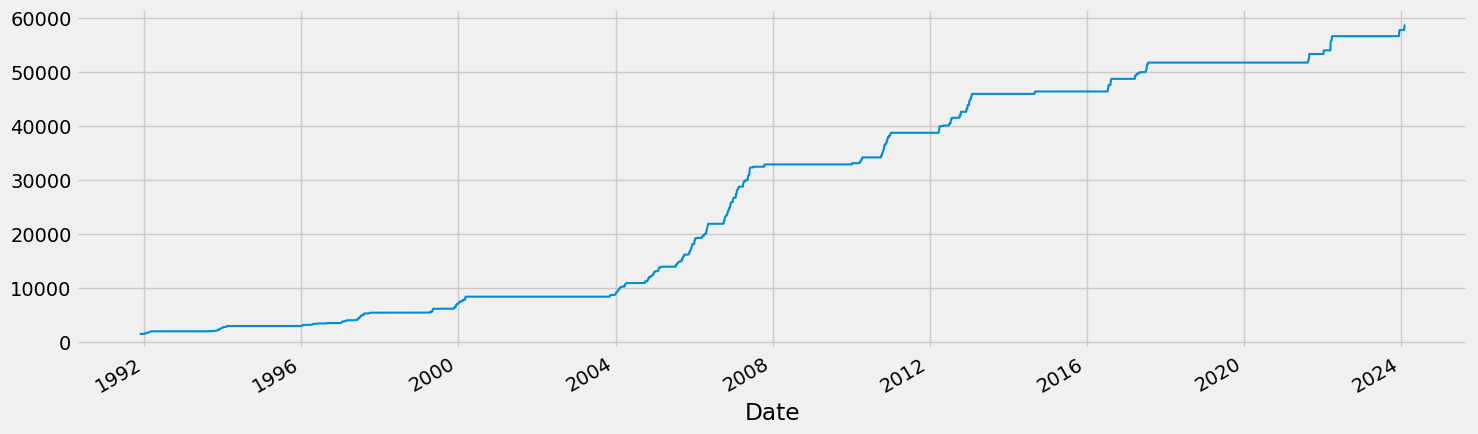

In [ ]:
max_acum.plot()

In [ ]:
drawdown_1 = (ipc-max_acum)/max_acum
drawdown_1

Date
1991-11-18 00:00:00-06:00    0.000000
1991-11-19 00:00:00-06:00   -0.035878
1991-11-21 00:00:00-06:00   -0.019775
1991-11-22 00:00:00-06:00   -0.028039
1991-11-26 00:00:00-06:00   -0.035808
                               ...   
2024-02-02 00:00:00-06:00    0.000000
2024-02-06 00:00:00-06:00    0.000000
2024-02-07 00:00:00-06:00    0.000000
2024-02-08 00:00:00-06:00   -0.016171
2024-02-09 00:00:00-06:00   -0.023579
Name: Close, Length: 8071, dtype: float64

<Axes: xlabel='Date'>

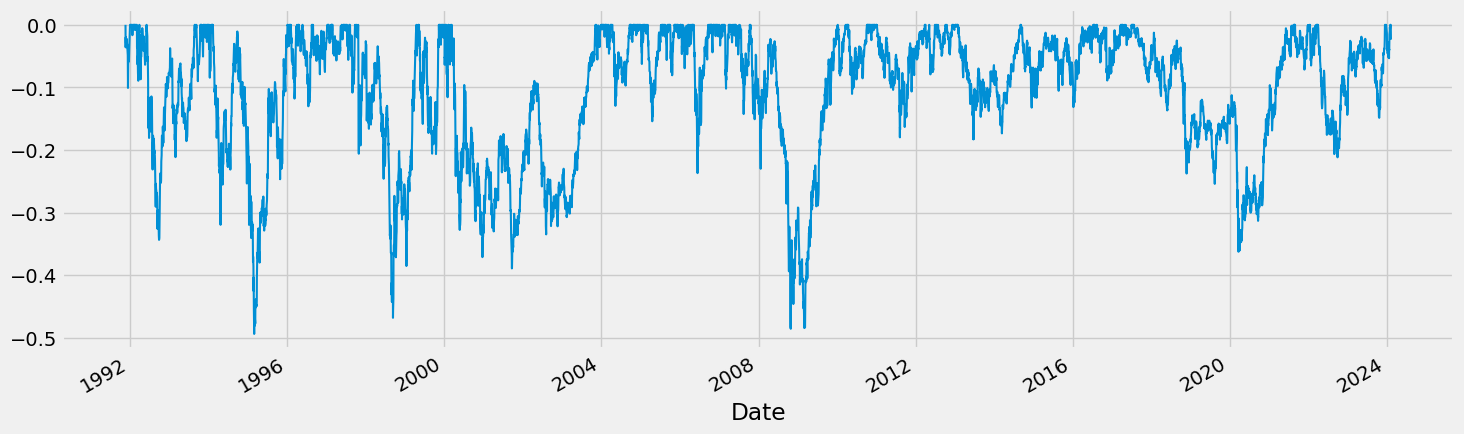

In [ ]:
drawdown_1.plot()

In [ ]:
drawdown_1.min()

-0.4938408686625221

# Retornos

In [ ]:
r_ipc = (ipc)/(ipc.shift(1))-1 #Para cumplir el supuesto e ~N(0,1), se cumple el de la media=0, sin embargo la varianza no es constante, por eso la vamos a condicionar con un modelo ARCH -GARCH.
r_ipc_1 = r_ipc.dropna()
#El retorno en el tiempo t, es el rendimiento expresado en relación al tiempo anterior.

# Gráfica de los Retornos

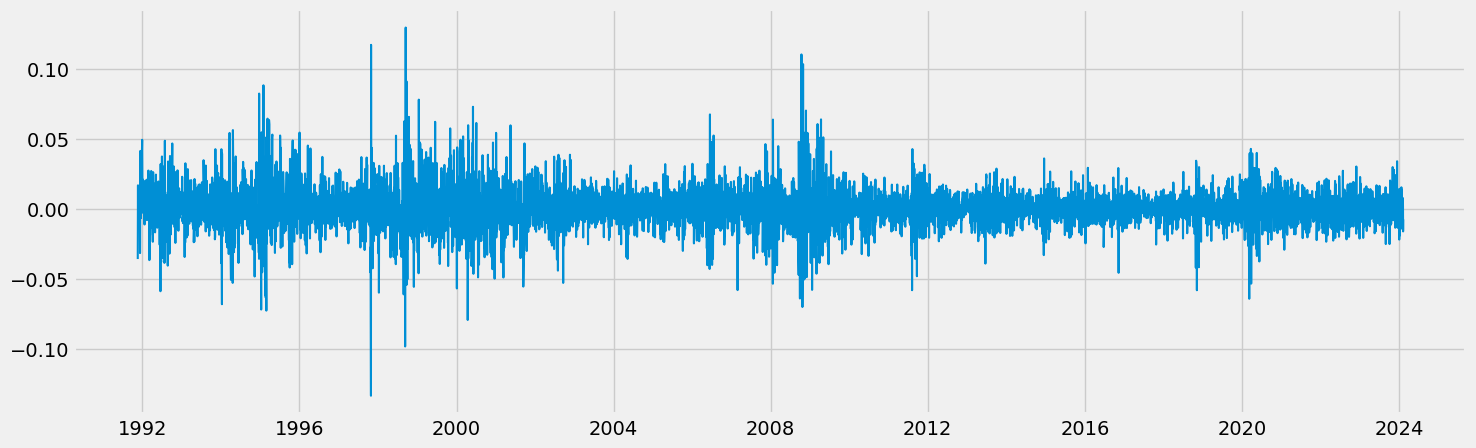

In [ ]:
plt.plot(r_ipc_1)

# Modelo ARCH

In [ ]:
#Cargar los datos
company = '^MXX'
ticker = yf.Ticker(company)
hist = ticker.history(start = '1991-11-17', end='2024-2-12')

hist


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1991-11-18 00:00:00-06:00,1415.900024,1415.900024,1415.900024,1415.900024,0,0.0,0.0
1991-11-19 00:00:00-06:00,1365.099976,1365.099976,1365.099976,1365.099976,0,0.0,0.0
1991-11-21 00:00:00-06:00,1387.900024,1387.900024,1387.900024,1387.900024,0,0.0,0.0
1991-11-22 00:00:00-06:00,1376.199951,1376.199951,1376.199951,1376.199951,0,0.0,0.0
1991-11-26 00:00:00-06:00,1365.199951,1365.199951,1365.199951,1365.199951,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-06:00,58012.878906,58273.171875,57744.339844,58226.769531,166980800,0.0,0.0
2024-02-06 00:00:00-06:00,58271.750000,59015.398438,57782.699219,58645.421875,266012200,0.0,0.0
2024-02-07 00:00:00-06:00,58625.929688,59020.550781,58382.761719,58711.871094,182573800,0.0,0.0


In [ ]:
ipc = hist["Close"]

In [ ]:
#from skimpy import skim
#skim (ipc)

# Se realiza la prueba de Dickey-Fuller para probar estacionalidad

In [ ]:
#result = adfuller( ipc.value.dropna())
#print("ADF Statistic: %f" %result[0])
#print("p-value:%f" % result[1])

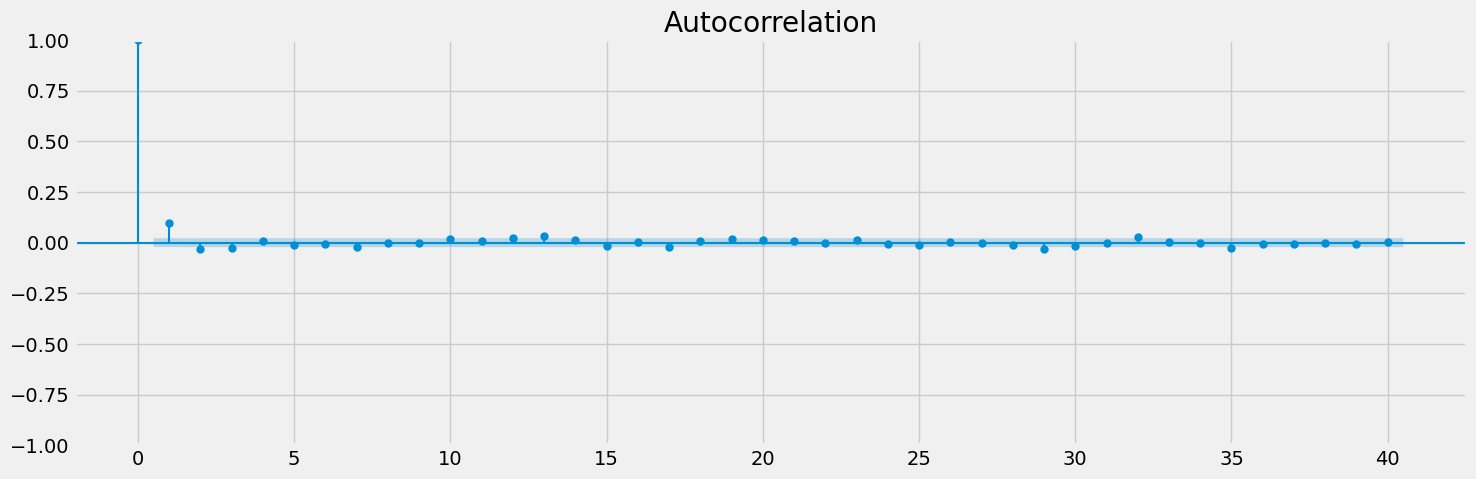

In [ ]:
grafica1 = plot_acf (r_ipc.dropna())

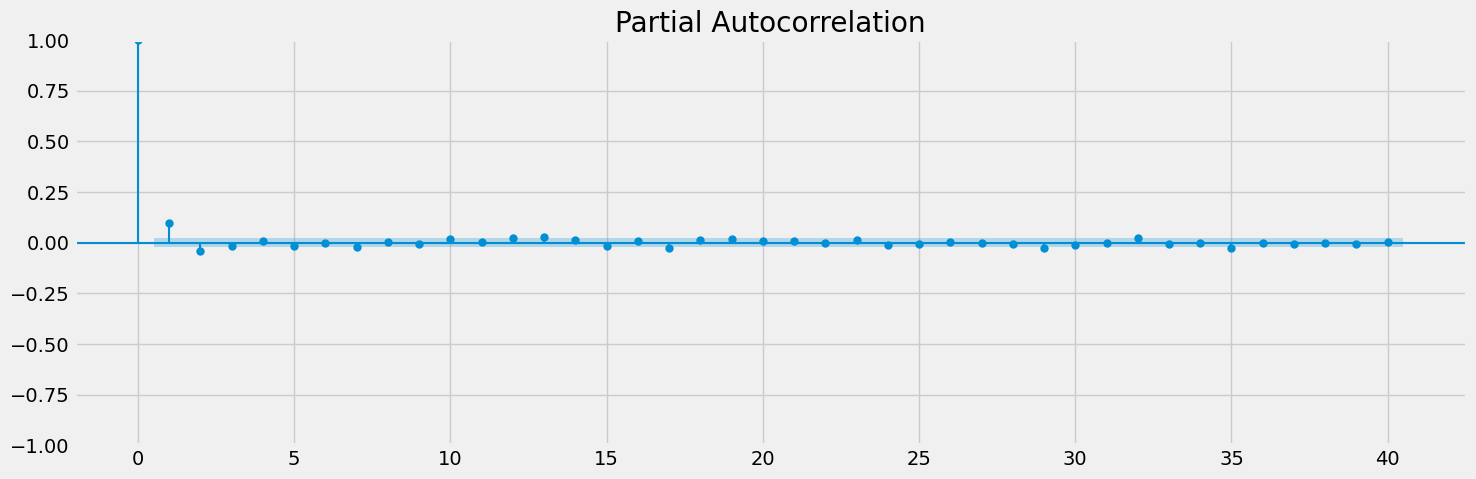

In [ ]:
grafica2 = plot_pacf (r_ipc.dropna())

In [ ]:
ipctest = adfuller (hist["Close"], autolag= "AIC")

In [ ]:
print("1. ADF : ", ipctest[0])
print("2. P-Value : ", ipctest[1])
print("3. Num Of Lags :", ipctest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation: ", ipctest[3])
print("5. Critical Values :")
for key, val in ipctest[4].items():
   print("\t",key, ":", val )

1. ADF :  -0.2720868450535684
2. P-Value :  0.9293656880733006
3. Num Of Lags : 3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation:  8067
5. Critical Values :
	 1% : -3.431160881621881
	 5% : -2.8618983519858214
	 10% : -2.5669607460281085


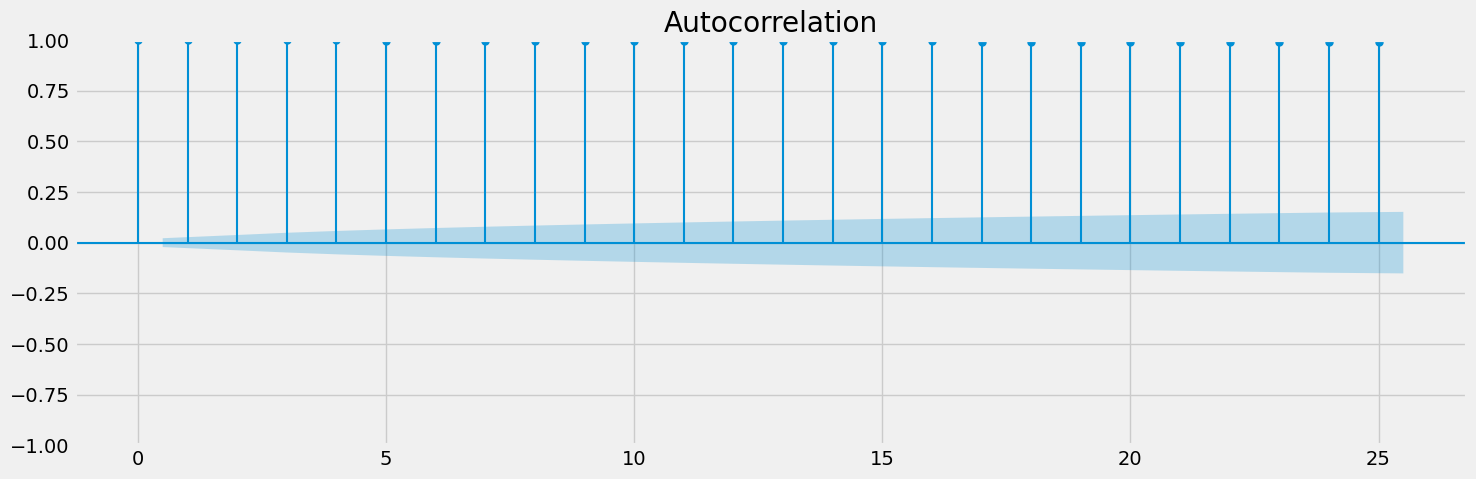

In [ ]:
acf = plot_acf((hist["Close"]), lags=25)

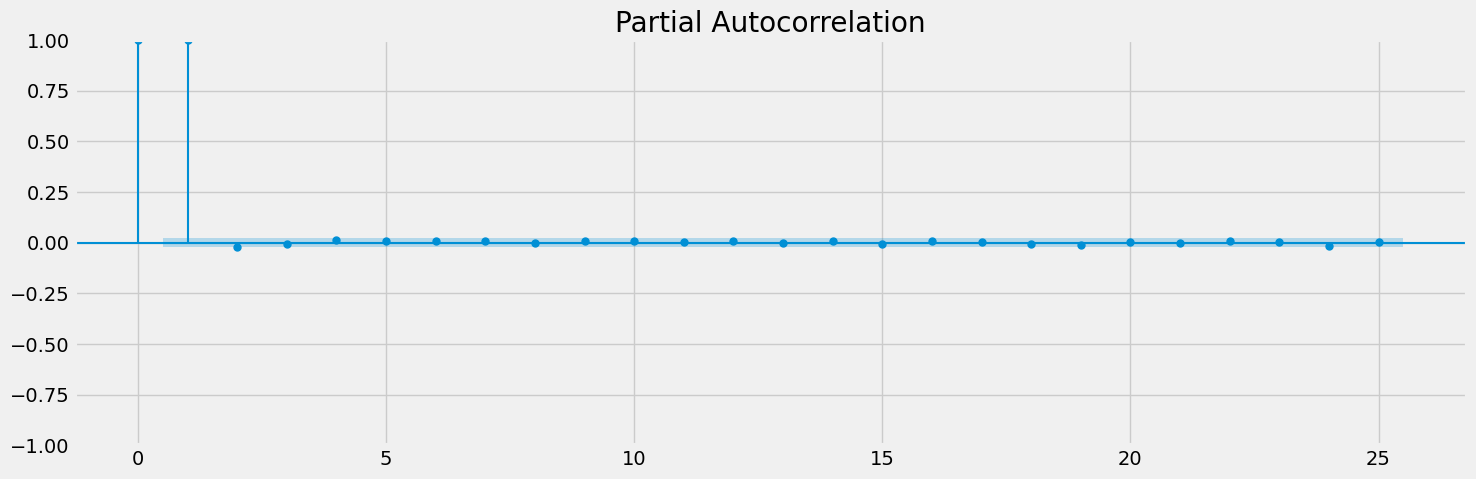

In [ ]:
pacf = plot_pacf((hist["Close"]), lags=25)